<a href="https://colab.research.google.com/github/kondjiri/Satellite-Imagery-and-Deep-Learning/blob/master/Satellite_Imagery_Classification_Using_Tranfer_Learning_%26_PCA_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model,Sequential
from keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPool2D,Activation
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.utils.np_utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X = open('/content/drive/My Drive/DataSet/X.pickle','rb')
Y = open('/content/drive/My Drive/DataSet/Y.pickle','rb')

data = pickle.load(X)
label = pickle.load(Y)

train_data = np.array(data).reshape(-1,224,224,3)
train_label = np.array(label).reshape(-1,1)

train_x,test_x,train_y,test_y = train_test_split(train_data,train_label,test_size=0.2,random_state=42)
train_x,test_x = train_x.astype('float32')/255.0,test_x.astype('float32')/255.0
train_y,test_y = to_categorical(train_y,21),to_categorical(test_y,21)

In [ ]:
model = VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
features_train = model.predict(train_x)
features_test = model.predict(test_x) 

In [ ]:
x_train = MinMaxScaler().fit_transform(features_train)
x_test = MinMaxScaler().fit_transform(features_test)

In [ ]:
pca = PCA(0.95)
train_x_pca = pca.fit_transform(x_train)
test_x_pca = pca.fit_transform(x_test)

In [ ]:
simple_model = Sequential()
simple_model.add(Dense(128,kernel_initializer='he_normal'))
simple_model.add(Activation('relu'))
simple_model.add(Dense(21,activation='softmax'))
simple_model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer='adam')

In [ ]:
history = simple_model.fit(train_x_pca,train_y,batch_size=256,epochs=30)

Epoch 1/30
7/7 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9976
Epoch 2/30
7/7 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9988
Epoch 3/30
7/7 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9994
Epoch 4/30
7/7 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9994
Epoch 5/30
7/7 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9994
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9994
Epoch 7/30
7/7 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.9994
Epoch 8/30
7/7 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 9/30
7/7 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 10/30
7/7 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 11/30
7/7 [======================

In [ ]:
loss,acc = simple_model.evaluate(train_x_pca,train_y)
print("Loss: {:.2f} & Accuracy : {:.2f}%".format(loss,acc*100))

53/53 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 1.0000
Loss: 0.01 & Accuracy : 100.00%


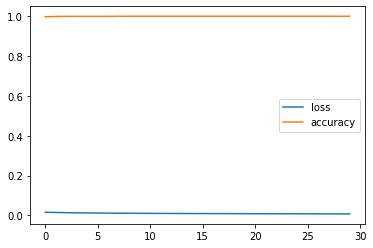

In [ ]:
for show in ['loss','accuracy']:
  plt.plot(history.history[show],label=show)
  plt.legend()
plt.show()